In [1]:
import pandas as pd

edges = pd.read_csv("edges.csv", index_col=0)
investors = pd.read_csv("investors.csv", index_col=0)
stocks = pd.read_csv("stocks.csv", index_col=0)

C:\Users\ersin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
C:\Users\ersin\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# FİRST SOLVE ERROR IN VOLATILITY CAT CALCULATION

In [2]:
prices = pd.read_csv("prices_final.csv", index_col=0)

In [3]:
prices

,ticker,quarter,quarterly_volatility,quarterly_volume,quarterly_price,was_in_sp500
0,A,1999-12-31,0.062768,172198500,34.580651,False
1,A,2000-03-31,0.079432,135495200,66.964817,False
2,A,2000-06-30,0.072011,333488000,57.967057,True
3,A,2000-09-30,0.058517,350473500,39.044759,True
4,A,2000-12-31,0.052617,248571600,35.531911,True
...,...,...,...,...,...,...
175888,ZYNE,2016-09-30,0.049182,13606500,9.497656,False
175889,ZYNE,2016-12-31,0.041705,13470600,13.468254,False
175890,ZYNE,2017-03-31,0.049640,28884800,19.872419,False
175891,ZYNE,2017-06-30,0.036543,27600500,19.882540,False


In [4]:
import pandas as pd
from scipy import stats
import numpy as np 
# Assuming grouped_df and merged_df are defined

# Calculate percentiles for 'quarterly_volatility' in grouped_df
volatility_percentiles = prices['quarterly_volatility'].quantile([0.05, 0.5, 0.95]).to_dict()

# Calculate percentiles for 'quarterly_volume' in grouped_df
volume_percentiles = prices['quarterly_volume'].quantile([0.05, 0.5, 0.95]).to_dict()

def categorize_volume(value):
    if pd.isna(value):
        return np.nan  # Return NaN if the value is NaN
    elif value <= volume_percentiles[0.05]:
        return 'very low'
    elif value <= volume_percentiles[0.5]:
        return 'low'
    elif value <= volume_percentiles[0.95]:
        return 'high'
    else:
        return 'very high'
    

def categorize_volatility(value):
    if pd.isna(value):
        return np.nan  # Return NaN if the value is NaN
    elif value <= volatility_percentiles[0.05]:
        return 'very low'
    elif value <= volatility_percentiles[0.5]:
        return 'low'
    elif value <= volatility_percentiles[0.95]:
        return 'high'
    else:
        return 'very high'

# Apply the categorization functions to 'merged_df'
prices['volatility_category'] = prices['quarterly_volatility'].apply(categorize_volatility)
prices['volume_category'] = prices['quarterly_volume'].apply(categorize_volume)

In [5]:
prices.volatility_category.value_counts()

volatility_category
high         79013
low          79013
very high     8780
very low      8780
Name: count, dtype: int64

{'high': 79151, 'low': 79148, 'very low': 8799, 'very high': 8795}

C:\Users\ersin\AppData\Local\Temp\ipykernel_5280\2289060133.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(volatility_counts.keys(), rotation=45, fontsize=16)
C:\Users\ersin\AppData\Local\Temp\ipykernel_5280\2289060133.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(volume_counts.keys(), rotation=45, fontsize=16)


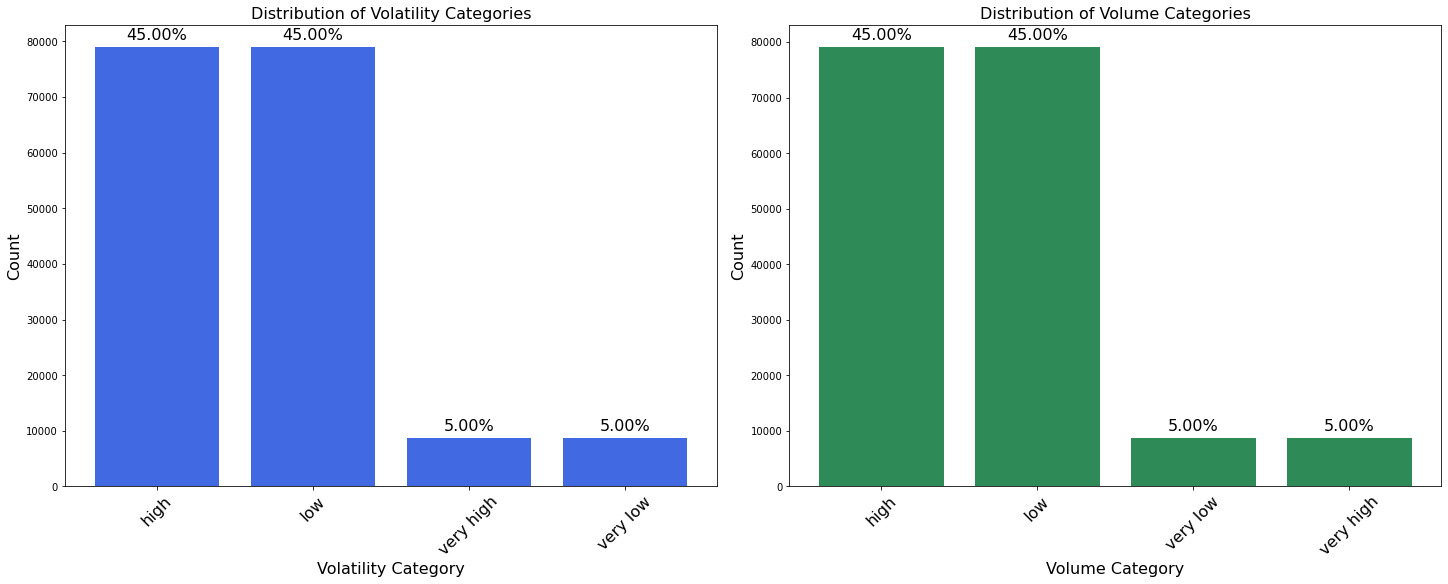

In [55]:
import matplotlib.pyplot as plt

# Your data
volatility_counts = prices.volatility_category.value_counts().to_dict()
volume_counts = prices.volume_category.value_counts().to_dict()

# Calculate the total for percentages
total_volatility = sum(volatility_counts.values())
total_volume = sum(volume_counts.values())

# Create subplots with constrained layout
fig, axes = plt.subplots(1, 2, figsize=(20, 8), constrained_layout=True)

# Plot for 'volatility category'
axes[0].bar(volatility_counts.keys(), volatility_counts.values(), color='royalblue')
axes[0].set_title('Distribution of Volatility Categories', fontsize=16)
axes[0].set_xlabel('Volatility Category', fontsize=16)
axes[0].set_ylabel('Count', fontsize=16)
axes[0].set_xticklabels(volatility_counts.keys(), rotation=45, fontsize=16)

# Adding percentages on the bars
for i, value in enumerate(volatility_counts.values()):
    axes[0].text(i, value + total_volatility*0.004, f'{(value/total_volatility)*100:.2f}%', ha='center', va='bottom', fontsize=16)

# Plot for 'volume category'
axes[1].bar(volume_counts.keys(), volume_counts.values(), color='seagreen')
axes[1].set_title('Distribution of Volume Categories', fontsize=16)
axes[1].set_xlabel('Volume Category', fontsize=16)
axes[1].set_ylabel('Count', fontsize=16)
axes[1].set_xticklabels(volume_counts.keys(), rotation=45, fontsize=16)

# Adding percentages on the bars
for i, value in enumerate(volume_counts.values()):
    axes[1].text(i, value + total_volume*0.004, f'{(value/total_volume)*100:.2f}%', ha='center', va='bottom', fontsize=16)

# Show plot
plt.show()


In [9]:
edges.head()

,cikname,name,quarter,changeCat,delay_cat,volatility_category,volume_category,direction
0,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,2015-06-30,Buy,on time,NaN,NaN,stock_to_investor
1,FRED ALGER MANAGEMENT INC,AAR CORP,2011-12-31,Large Sale,on time,very low,high,investor_to_stock
2,FRED ALGER MANAGEMENT INC,AAR CORP,2012-03-31,Significant Sale,on time,very low,low,investor_to_stock
3,FRED ALGER MANAGEMENT INC,ADT CORP,2012-12-31,Significant Buy,on time,NaN,NaN,stock_to_investor
4,FRED ALGER MANAGEMENT INC,ADT CORP,2013-03-31,Large Buy,on time,NaN,NaN,stock_to_investor


In [10]:
prices.head()

,ticker,quarter,quarterly_volatility,quarterly_volume,quarterly_price,was_in_sp500,volatility_category,volume_category
0,A,1999-12-31,0.062768,172198500,34.580651,False,high,high
1,A,2000-03-31,0.079432,135495200,66.964817,False,very high,high
2,A,2000-06-30,0.072011,333488000,57.967057,True,high,high
3,A,2000-09-30,0.058517,350473500,39.044759,True,high,high
4,A,2000-12-31,0.052617,248571600,35.531911,True,high,high


In [11]:
stocks.head()

,name,ticker,equityType,sicSector,sicIndustry,ticker_classification
0,AAC HOLDINGS INC,AACH,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,mid
1,AAR CORP,AIR,Domestic Common Stock,Manufacturing,Aircraft & Parts,mid
3,ADT CORP,ADT1,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,mid
8,AFLAC INC,AFL,Domestic Common Stock Primary Class,Finance Insurance And Real Estate,Accident & Health Insurance,large
17,AMC NETWORKS INC,AMCX,Domestic Common Stock,Transportation Communications Electric Gas And...,Cable & Other Pay Television Services,mid


In [12]:
merged_df = pd.merge(edges, stocks, on=['name'], how='left')
merged_df.shape

(24596386, 13)

In [16]:
merged_df.tail()

,cikname,name,quarter,changeCat,delay_cat,volatility_category,volume_category,direction,ticker,equityType,sicSector,sicIndustry,ticker_classification
24596381,RAYNOR GEOFFREY,ENETI INC,2016-03-31,Significant Buy,late,NaN,NaN,stock_to_investor,NETI,ADR Common Stock Primary Class,Transportation Communications Electric Gas And...,Deep Sea Foreign Transportation Of Freight,mid
24596382,RAYNOR GEOFFREY,ENETI INC,2016-06-30,Large Buy,late,NaN,NaN,stock_to_investor,NETI,ADR Common Stock Primary Class,Transportation Communications Electric Gas And...,Deep Sea Foreign Transportation Of Freight,mid
24596383,RAYNOR GEOFFREY,ENETI INC,2017-03-31,Significant Sale,late,NaN,NaN,investor_to_stock,NETI,ADR Common Stock Primary Class,Transportation Communications Electric Gas And...,Deep Sea Foreign Transportation Of Freight,mid
24596384,RAYNOR GEOFFREY,ENETI INC,2017-06-30,Large Sale,late,NaN,NaN,investor_to_stock,NETI,ADR Common Stock Primary Class,Transportation Communications Electric Gas And...,Deep Sea Foreign Transportation Of Freight,mid
24596385,RAYNOR GEOFFREY,ENETI INC,2017-09-30,Large Sale,on time,NaN,NaN,investor_to_stock,NETI,ADR Common Stock Primary Class,Transportation Communications Electric Gas And...,Deep Sea Foreign Transportation Of Freight,mid


In [17]:
prices.tail()

,ticker,quarter,quarterly_volatility,quarterly_volume,quarterly_price,was_in_sp500,volatility_category,volume_category
175888,ZYNE,2016-09-30,0.049182,13606500,9.497656,False,high,low
175889,ZYNE,2016-12-31,0.041705,13470600,13.468254,False,high,low
175890,ZYNE,2017-03-31,0.049640,28884800,19.872419,False,high,high
175891,ZYNE,2017-06-30,0.036543,27600500,19.882540,False,high,high
175892,ZYNE,2017-09-30,0.108119,67417000,10.572698,False,very high,high


In [19]:
stocks.shape, prices.shape, edges.shape

((11679, 6), (175893, 8), (24034481, 8))

In [18]:
merged_df2 = pd.merge(merged_df, prices, on=['ticker','quarter'], how='left')
merged_df2.shape

(24596386, 19)

In [21]:
merged_df2.head() # vol_x ler drop edilecek, bozuk onlar.

,cikname,name,quarter,changeCat,delay_cat,volatility_category_x,volume_category_x,direction,ticker,equityType,sicSector,sicIndustry,ticker_classification,quarterly_volatility,quarterly_volume,quarterly_price,was_in_sp500,volatility_category_y,volume_category_y
0,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,2015-06-30,Buy,on time,NaN,NaN,stock_to_investor,AACH,Domestic Common Stock,Services,Services-Specialty Outpatient Facilities Nec,mid,NaN,NaN,NaN,NaN,NaN,NaN
1,FRED ALGER MANAGEMENT INC,AAR CORP,2011-12-31,Large Sale,on time,very low,high,investor_to_stock,AIR,Domestic Common Stock,Manufacturing,Aircraft & Parts,mid,0.038788,21965400.0,18.309682,False,high,high
2,FRED ALGER MANAGEMENT INC,AAR CORP,2012-03-31,Significant Sale,on time,very low,low,investor_to_stock,AIR,Domestic Common Stock,Manufacturing,Aircraft & Parts,mid,0.021702,15572200.0,21.314678,False,low,high
3,FRED ALGER MANAGEMENT INC,ADT CORP,2012-12-31,Significant Buy,on time,NaN,NaN,stock_to_investor,ADT1,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,mid,NaN,NaN,NaN,NaN,NaN,NaN
4,FRED ALGER MANAGEMENT INC,ADT CORP,2013-03-31,Large Buy,on time,NaN,NaN,stock_to_investor,ADT1,Domestic Common Stock,Services,Services-Detective Guard & Armored Car Services,mid,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
merged_df2 = merged_df2.drop(columns=['volatility_category_x', 'volume_category_x',
                                      'equityType','quarterly_volatility','quarterly_volume'])


In [26]:
merged_final = pd.merge(merged_df2, investors, on=['cikname'], how='left')


In [27]:
merged_final.shape

(24596386, 15)

In [30]:
dropped = merged_final.drop_duplicates(subset=['cikname', 'name','quarter', 'changeCat'], keep='last')

In [31]:
dropped.shape

(24033284, 15)

In [33]:
dropped.head()

,cikname,name,quarter,changeCat,delay_cat,direction,ticker,sicSector,sicIndustry,ticker_classification,quarterly_price,was_in_sp500,volatility_category_y,volume_category_y,investor_rank
0,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,2015-06-30,Buy,on time,stock_to_investor,AACH,Services,Services-Specialty Outpatient Facilities Nec,mid,NaN,NaN,NaN,NaN,large_investor
1,FRED ALGER MANAGEMENT INC,AAR CORP,2011-12-31,Large Sale,on time,investor_to_stock,AIR,Manufacturing,Aircraft & Parts,mid,18.309682,False,high,high,large_investor
2,FRED ALGER MANAGEMENT INC,AAR CORP,2012-03-31,Significant Sale,on time,investor_to_stock,AIR,Manufacturing,Aircraft & Parts,mid,21.314678,False,low,high,large_investor
3,FRED ALGER MANAGEMENT INC,ADT CORP,2012-12-31,Significant Buy,on time,stock_to_investor,ADT1,Services,Services-Detective Guard & Armored Car Services,mid,NaN,NaN,NaN,NaN,large_investor
4,FRED ALGER MANAGEMENT INC,ADT CORP,2013-03-31,Large Buy,on time,stock_to_investor,ADT1,Services,Services-Detective Guard & Armored Car Services,mid,NaN,NaN,NaN,NaN,large_investor


# CREATE GRAPH

In [ ]:
import networkx as nx
import pandas as pd
from tqdm import tqdm

# Replace 'dropped' with 'df' if that's your DataFrame
for index, row in tqdm(df.iterrows()):
    # Define nodes based on the transaction type
    if row['changeCat'] in ['Large Buy', 'Buy', 'Significant Buy']:
        # For a buy, the direction is from investor to stock
        investor, stock = row['cikname'], row['name']
        investor_type, stock_type = row['investor_rank'], row['ticker_classification']
    elif row['changeCat'] in ['Large Sale', 'Sale', 'Significant Sale']:
        # For a sale, the direction is from stock to investor
        stock, investor = row['name'], row['cikname']
        stock_type, investor_type = row['ticker_classification'], row['investor_rank']
    else:
        continue  # Skip rows that don't match the criteria

    # Add nodes with their attributes (if not already added)
    if not G.has_node(investor):
        G.add_node(investor, bipartite=0, type=investor_type)
    if not G.has_node(stock):
        G.add_node(stock, bipartite=1, type=stock_type)

    # Add edge with attributes
    G.add_edge(investor, stock,
               quarter=pd.to_datetime(row['quarter']),
               equity_industry=row["equity_sicsector"],
               share_change=row["filing_share_change_cat"],
               filing_delay=row["filing_delay_cat"],
               volume_category=row['volume_category'],
               volatility_category=row['volatility_category'],
               was_in_sp500=row['was_in_sp500'])


In [34]:
dropped.head()

,cikname,name,quarter,changeCat,delay_cat,direction,ticker,sicSector,sicIndustry,ticker_classification,quarterly_price,was_in_sp500,volatility_category_y,volume_category_y,investor_rank
0,FRED ALGER MANAGEMENT INC,AAC HOLDINGS INC,2015-06-30,Buy,on time,stock_to_investor,AACH,Services,Services-Specialty Outpatient Facilities Nec,mid,NaN,NaN,NaN,NaN,large_investor
1,FRED ALGER MANAGEMENT INC,AAR CORP,2011-12-31,Large Sale,on time,investor_to_stock,AIR,Manufacturing,Aircraft & Parts,mid,18.309682,False,high,high,large_investor
2,FRED ALGER MANAGEMENT INC,AAR CORP,2012-03-31,Significant Sale,on time,investor_to_stock,AIR,Manufacturing,Aircraft & Parts,mid,21.314678,False,low,high,large_investor
3,FRED ALGER MANAGEMENT INC,ADT CORP,2012-12-31,Significant Buy,on time,stock_to_investor,ADT1,Services,Services-Detective Guard & Armored Car Services,mid,NaN,NaN,NaN,NaN,large_investor
4,FRED ALGER MANAGEMENT INC,ADT CORP,2013-03-31,Large Buy,on time,stock_to_investor,ADT1,Services,Services-Detective Guard & Armored Car Services,mid,NaN,NaN,NaN,NaN,large_investor


# GROUPED DATAFRAMES FOR EACH QUARTER

In [117]:
grouped_dfs = [(name, group) for name, group in dropped.groupby('quarter')]


In [136]:
stock_groups = dropped.groupby('name').first()['ticker_classification']
investor_groups = dropped.groupby('cikname').first()['investor_rank']

In [137]:
####################################################################################################

def extract_graph_from_df(df,stock_groups,investor_groups):
    

    # Initialize a directed graph
    G = nx.DiGraph()
    
    # Adding nodes in bulk with their attributes
    G.add_nodes_from([(stock, {'bipartite': 0, 'type': stock_type}) for stock, stock_type in stock_groups.items()])
    G.add_nodes_from([(investor, {'bipartite': 1, 'type': investor_type}) for investor, investor_type in investor_groups.items()])
    
    # Loop through the DataFrame to add edges
    for index, row in tqdm(df.iterrows()):
        u = row["name"]  # stock
        v = row["cikname"]  # investor

        # Define edge attributes
        edge_attrs = {
            'quarter': pd.to_datetime(row['quarter']),
            'share_change': row["changeCat"],
            'filing_delay': row["delay_cat"],
            'direction': row["direction"],
            'sector': row["sicSector"],
            'industry': row["sicIndustry"],
            'volume_category': row['volume_category_y'],
            'volatility_category': row['volatility_category_y'],
            'quarterly_price': row['quarterly_price']
        }

        # Check for the type of transaction and add edge accordingly
        if row['changeCat'] in ['Large Buy', 'Buy', 'Significant Buy']:
            if not G.has_edge(u, v):
                G.add_edge(u, v, **edge_attrs)
        elif row['changeCat'] in ['Large Sale', 'Sale', 'Significant Sale']:
            if not G.has_edge(v, u):
                G.add_edge(v, u, **edge_attrs)
        else:
            continue  
    ####################################################################################################
        
    return G

# CREATE AND WRITE GRAPHS TO FOLDER

In [142]:
import networkx as nx
import os
import pickle
from tqdm.auto import tqdm

def save_graphs_to_pickle(grouped_dfs, folder_path):
    """
    Save graphs to pickle files.

    :param graph_generator: A function that returns a NetworkX graph.
    :param num_graphs: The number of graphs to generate and save.
    :param folder_path: The path to the folder where graphs will be saved.
    """
    # Create the folder if it doesn't exist
    os.makedirs(folder_path, exist_ok=True)

    # Iterate and save each graph
    for name, df in tqdm(grouped_dfs):
        # Generate the graph using the provided function
        G = extract_graph_from_df(df,stock_groups,investor_groups)

        # Construct the file path for the pickle file
        file_path = os.path.join(folder_path, f'graph_{name}.pkl')

        # Write the graph to a pickle file
        with open(file_path, 'wb') as f:
            pickle.dump(G, f)
            



In [143]:
save_graphs_to_pickle(grouped_dfs, "quarterly_graphs")

  0%|          | 0/74 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

# GRAPHS ARE SAVED!! ALL CLEAN 74 GRAPH.

In [140]:
Gb = pickle.load(open('folder1/graph_1999-06-30.pkl', 'rb'))

In [141]:
print("Number of nodes:", Gb.number_of_nodes())
print("Number of edges:", Gb.number_of_edges())

Number of nodes: 20219
Number of edges: 209368


In [ ]:
Number of nodes: 6716
Number of edges: 209368


In [113]:
from networkx.algorithms import bipartite
from collections import defaultdict


# Function to calculate disparity measure of a graph
def calculate_disparity(G):
    disparity_scores = []
    for node in G.nodes():
        degree = G.degree(node)  # Total number of edges for node i
        if degree > 0:  # To avoid division by zero
            disparity = sum([(1 / degree)**2 for _ in range(degree)])
            disparity_scores.append(disparity)
    # Avoid division by zero if there are no nodes
    return sum(disparity_scores) / len(G.nodes()) if G.nodes() else 0


####################################################################################################

def calc_motifs1(G):
    # Assuming G is your graph

    motif_count = 0
    motifs = []

    for node in G.nodes:
        # Check if the node is an investor
        if G.nodes[node].get('bipartite') == 1:
            # Iterate over all successors of the investor
            for stock in G.successors(node):
                # Check if the successor is a stock
                if G.nodes[stock].get('bipartite') == 0:
                    # Iterate over all successors of the stock
                    for investor_c in G.successors(stock):
                        # Check if the end node is an investor and not the same as the starting node
                        if G.nodes[investor_c].get('bipartite') == 1 and investor_c != node:
                            motif_count += 1
                            motifs.append((node, stock, investor_c))

    # print("List of motifs (investor_a, stock_b, investor_c):", motifs)
    return motif_count

def calc_motifs2(G):
    motif_count = 0
    motifs = []

    for node in G.nodes:
        # Check if the node is an investor
        if G.nodes[node].get('bipartite') == 1:
            # Iterate over all successors of the investor
            for stock in G.successors(node):
                # Check if the successor is a stock
                if G.nodes[stock].get('bipartite') == 0:
                    # Check if the edge from investor to stock has 'filing_delay' == 'Late'
                    if G.get_edge_data(node, stock).get('filing_delay') == 'late':
                        motif_count += 1
                        motifs.append((node, stock))

    return motif_count

def calc_motifs3(G):
    motifs = []
    motif_count = 0

    for investor_node in filter(lambda n: G.nodes[n].get('bipartite') == 1, G.nodes):
        industry_late_buys = defaultdict(int)
        
        for stock_node, edge_data in G[investor_node].items():
            if edge_data.get('filing_delay') == 'late':
                industry = edge_data.get('equity_industry')
                industry_late_buys[industry] += 1

        # Check if the investor has late buys in the same industry from multiple sources
        for industry, count in industry_late_buys.items():
            if count > 1:  # More than one late buy in the same industry
                motifs.append((investor_node, industry, count))
                motif_count += 1

    return motif_count



def calc_motifs4(G):
    motifs = []
    motif_count = 0

    for investor_node in filter(lambda n: G.nodes[n].get('bipartite') == 1, G.nodes):
        industry_trading = defaultdict(lambda: {'Buy': set(), 'Sale': set()})

        for stock_node, edge_data in G[investor_node].items():
            industry = edge_data.get('equity_industry')
            share_change = edge_data.get('share_change')
            quarter = edge_data.get('quarter')

            if share_change in [ 'Large Buy','Significant Buy', 'Large Sale', 'Significant Sale']:
                industry_trading[industry][share_change.split()[1]].add(quarter)

        # Check for both 'Buy' and 'Sale' in the same industry and quarter
        for industry, transactions in industry_trading.items():
            if transactions['Buy'].intersection(transactions['Sale']):
                motif_count += 1
                motifs.append((investor_node, industry))

    return motif_count

####################################################################################################

def extract_report_from_df(df):
    
    stock_groups = df.groupby('name').first()['ticker_classification']
    investor_groups = df.groupby('cikname').first()['investor_rank']
    
    # Initialize a directed graph
    G = nx.DiGraph()
    
    # Adding nodes in bulk with their attributes
    G.add_nodes_from([(stock, {'bipartite': 0, 'type': stock_type}) for stock, stock_type in stock_groups.items()])
    G.add_nodes_from([(investor, {'bipartite': 1, 'type': investor_type}) for investor, investor_type in investor_groups.items()])
    
    # Loop through the DataFrame to add edges
    for index, row in tqdm(df.iterrows()):
        u = row["name"]  # stock
        v = row["cikname"]  # investor

        # Define edge attributes
        edge_attrs = {
            'quarter': pd.to_datetime(row['quarter']),
            'share_change': row["changeCat"],
            'filing_delay': row["delay_cat"],
            'direction': row["direction"],
            'sector': row["sicSector"],
            'industry': row["sicIndustry"],
            'volume_category': row['volume_category_y'],
            'volatility_category': row['volatility_category_y'],
            'quarterly_price': row['quarterly_price']
        }

        # Check for the type of transaction and add edge accordingly
        if row['changeCat'] in ['Large Buy', 'Buy', 'Significant Buy']:
            if not G.has_edge(u, v):
                G.add_edge(u, v, **edge_attrs)
        elif row['changeCat'] in ['Large Sale', 'Sale', 'Significant Sale']:
            if not G.has_edge(v, u):
                G.add_edge(v, u, **edge_attrs)
        else:
            continue  
    ###########################################################
     # create identical graph, get their values as well
    ###########################################################
    
    
    ###########################################################
            #  write final graph to klasör
    ###########################################################     
            
            #  calculate stuff
    
    disparity = calculate_disparity(G) 
    density = nx.density(G)
    clustering = nx.average_clustering(G)
    
    motifs1 = calc_motifs1(G)
    motifs2 = calc_motifs2(G)
    motifs3 = calc_motifs3(G)
    motifs4 = calc_motifs4(G)
    ###########################################################
            #  return a result dataframe
    ###########################################################          
    return G,motifs1,motifs2,motifs3,motifs4, disparity, density, clustering

In [114]:
G,motifs1,motifs2,motifs3,motifs4, disparity, density, clustering = extract_report_from_df(grouped_dfs.get('2000-06-30'))

225392it [01:15, 2996.90it/s]


In [115]:
motifs1,motifs2,motifs3,motifs4, disparity, density, clustering

(7144337,
 16702,
 287,
 34,
 0.148554699425366,
 0.004516576010434886,
 0.06326264603247853)

In [ ]:
def calc_motifs(G):

    # Assuming G is your graph

    motif_count = 0
    motifs = []

    for node in G.nodes:
        # Check if the node is an investor
        if G.nodes[node].get('bipartite') == 1:
            # Iterate over all successors of the investor
            for stock in G.successors(node):
                # Check if the successor is a stock
                if G.nodes[stock].get('bipartite') == 0:
                    # Iterate over all successors of the stock
                    for investor_c in G.successors(stock):
                        # Check if the end node is an investor and not the same as the starting node
                        if G.nodes[investor_c].get('bipartite') == 1 and investor_c != node:
                            motif_count += 1
                            motifs.append((node, stock, investor_c))

    # print("List of motifs (investor_a, stock_b, investor_c):", motifs)
    return motif_count

In [96]:
grouped_dfs.get('2000-06-30').shape

(225392, 15)

In [57]:
e,d,f = extract_report_from_df(grouped_dfs.get('1999-09-30')) 


0it [00:06, ?it/s]


In [92]:
G.nodes(bipartite = 0)

TypeError: __call__() got an unexpected keyword argument 'bipartite'

In [58]:
e,d,f

(0.00029433406916850625, 2.1661323901126455e-08, 0.0)

In [38]:
stock_groups = dropped.groupby('name').first()['ticker_classification']
investor_groups = dropped.groupby('cikname').first()['investor_rank']

In [44]:
import networkx as nx
import pandas as pd
from tqdm import tqdm

# Assuming your DataFrame is named df

# Initialize a directed graph
G = nx.DiGraph()

# Adding nodes in bulk with their attributes
G.add_nodes_from([(stock, {'bipartite': 0, 'type': stock_type}) for stock, stock_type in stock_groups.items()])
G.add_nodes_from([(investor, {'bipartite': 1, 'type': investor_type}) for investor, investor_type in investor_groups.items()])

# Loop through the DataFrame to add edges
for index, row in tqdm(dropped.iterrows()):
    u = row["name"]  # stock
    v = row["cikname"]  # investor

    # Define edge attributes
    edge_attrs = {
        'quarter': pd.to_datetime(row['quarter']),
        'share_change': row["changeCat"],
        'filing_delay': row["delay_cat"],
        'direction': row["direction"],
        'sector': row["sicSector"],
        'industry': row["sicIndustry"],
        'volume_category': row['volume_category_y'],
        'volatility_category': row['volatility_category_y'],
        'quarterly_price': row['quarterly_price']
    }

    # Check for the type of transaction and add edge accordingly
    if row['changeCat'] in ['Large Buy', 'Buy', 'Significant Buy']:
        if not G.has_edge(u, v):
            G.add_edge(u, v, **edge_attrs)
    elif row['changeCat'] in ['Large Sale', 'Sale', 'Significant Sale']:
        if not G.has_edge(v, u):
            G.add_edge(v, u, **edge_attrs)
    else:
        continue  # Skip rows that don't match the criteria

322353it [01:54, 2805.53it/s]


KeyboardInterrupt: 

In [ ]:
from networkx.algorithms import bipartite


print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print(bipartite.is_bipartite(G))